## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Import tools and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics import regressionplots
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.metrics import r2_score

# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# Import main dataframe
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
# Clean data by dropping columns deemed unncessary

df_clean = df.drop(['id', 'heat_source', 'sewer_system', 'view', 'date', 'sqft_above', 'sqft_basement', 'yr_renovated', 'address', 'lat', 'long'], axis=1)

In [5]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_garage,sqft_patio,yr_built
0,675000.00000,4,1.00000,1180,7140,1.00000,NO,NO,NO,Good,7 Average,0,40,1969
1,920000.00000,5,2.50000,2770,6703,1.00000,NO,NO,YES,Average,7 Average,0,240,1950
2,311000.00000,6,2.00000,2880,6156,1.00000,NO,NO,NO,Average,7 Average,0,0,1956
3,775000.00000,3,3.00000,2160,1400,2.00000,NO,NO,NO,Average,9 Better,200,270,2010
4,592500.00000,2,2.00000,1120,758,2.00000,NO,NO,YES,Average,7 Average,550,30,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00000,5,2.00000,1910,4000,1.50000,NO,NO,NO,Good,8 Good,0,210,1921
30151,1313000.00000,3,2.00000,2020,5800,2.00000,NO,NO,NO,Average,7 Average,0,520,2011
30152,800000.00000,3,2.00000,1620,3600,1.00000,NO,NO,YES,Average,7 Average,240,110,1995
30153,775000.00000,3,2.50000,2570,2889,2.00000,NO,NO,NO,Average,8 Good,480,100,2006


In [6]:
# Convert string values to integers

df_clean['waterfront'].replace(['NO','YES'], [0,1], inplace = True)
df_clean['greenbelt'].replace(['NO','YES'], [0,1], inplace = True)
df_clean['nuisance'].replace(['NO','YES'], [0,1], inplace = True)

In [7]:
# Check non-integer values

df_clean['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

In [8]:
# Replace 'Condition' column with integers

df_clean['condition'].replace(['Poor','Fair', 'Average', 'Good', 'Very Good'], [0,1,2,3,4], inplace = True)

In [9]:
# Check to see results match previous value counts

df_clean['condition'].value_counts()

2    18547
3     8054
4     3259
1      230
0       65
Name: condition, dtype: int64

In [10]:
df_clean['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [11]:
# Extract numeric values from 'Grade' column and convert to integers

df_clean['grade'] = df_clean['grade'].str[:2].astype(np.int64)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        30155 non-null  float64
 1   bedrooms     30155 non-null  int64  
 2   bathrooms    30155 non-null  float64
 3   sqft_living  30155 non-null  int64  
 4   sqft_lot     30155 non-null  int64  
 5   floors       30155 non-null  float64
 6   waterfront   30155 non-null  int64  
 7   greenbelt    30155 non-null  int64  
 8   nuisance     30155 non-null  int64  
 9   condition    30155 non-null  int64  
 10  grade        30155 non-null  int64  
 11  sqft_garage  30155 non-null  int64  
 12  sqft_patio   30155 non-null  int64  
 13  yr_built     30155 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.2 MB


In [13]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_garage,sqft_patio,yr_built
0,675000.00000,4,1.00000,1180,7140,1.00000,0,0,0,3,7,0,40,1969
1,920000.00000,5,2.50000,2770,6703,1.00000,0,0,1,2,7,0,240,1950
2,311000.00000,6,2.00000,2880,6156,1.00000,0,0,0,2,7,0,0,1956
3,775000.00000,3,3.00000,2160,1400,2.00000,0,0,0,2,9,200,270,2010
4,592500.00000,2,2.00000,1120,758,2.00000,0,0,1,2,7,550,30,2012


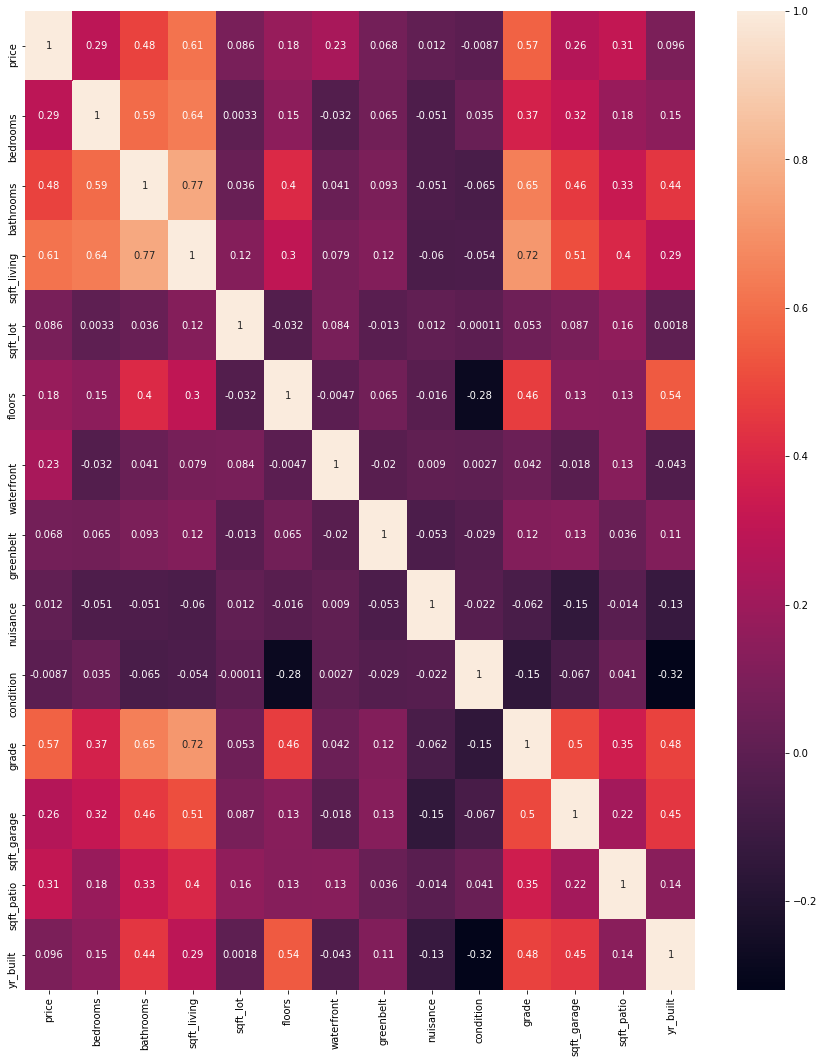

In [14]:
# Correlation heatmap for intial cleansed dataset

fig, ax = plt.subplots(figsize=(15, 18))

sns.heatmap(df_clean.corr(), annot=True);

In [15]:
df_clean.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_garage,sqft_patio,yr_built
price,1.00000,0.28920,0.48040,0.60852,0.08573,0.18058,0.23225,0.06826,0.01155,-0.00870,0.56526,0.26417,0.31341,0.09601
bedrooms,0.28920,1.00000,0.58927,0.63787,0.00331,0.14759,-0.03237,0.06484,-0.05083,0.03544,0.37476,0.31944,0.18344,0.14619
bathrooms,0.48040,0.58927,1.00000,0.77268,0.03589,0.40441,0.04092,0.09347,-0.05067,-0.06489,0.64778,0.45702,0.32755,0.44365
sqft_living,0.60852,0.63787,0.77268,1.00000,0.11956,0.30424,0.07880,0.11554,-0.05970,-0.05393,0.72136,0.51174,0.39603,0.29169
sqft_lot,0.08573,0.00331,0.03589,0.11956,1.00000,-0.03210,0.08365,-0.01279,0.01245,-0.00011,0.05334,0.08717,0.15525,0.00175
floors,0.18058,0.14759,0.40441,0.30424,-0.03210,1.00000,-0.00475,0.06501,-0.01629,-0.28185,0.46477,0.13266,0.12518,0.54465
waterfront,0.23225,-0.03237,0.04092,0.07880,0.08365,-0.00475,1.00000,-0.01985,0.00903,0.00268,0.04215,-0.01810,0.13137,-0.04297
greenbelt,0.06826,0.06484,0.09347,0.11554,-0.01279,0.06501,-0.01985,1.00000,-0.05301,-0.02907,0.11861,0.12782,0.03578,0.11054
nuisance,0.01155,-0.05083,-0.05067,-0.05970,0.01245,-0.01629,0.00903,-0.05301,1.00000,-0.02189,-0.06179,-0.14753,-0.01420,-0.12648
condition,-0.00870,0.03544,-0.06489,-0.05393,-0.00011,-0.28185,0.00268,-0.02907,-0.02189,1.00000,-0.15313,-0.06749,0.04112,-0.31904


In [16]:
# Create base model

y = df_clean['price']
X = df_clean['sqft_living']

model_base = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()

In [17]:
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:25:35   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Modify dataset so mean = 0

X_centered = df_clean.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_garage,sqft_patio,yr_built
count,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000
mean,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,896385.65919,0.98161,0.88956,974.04432,60382.60402,0.56772,0.13006,0.15804,0.37954,0.70252,1.14898,285.77054,245.30279,32.06736
min,-1081175.83787,-3.41353,-2.33474,-2109.42474,-16321.59592,-0.54349,-0.01721,-0.02563,-0.17450,-2.47130,-6.65137,-330.21114,-217.41204,-75.16395
25%,-460535.83787,-0.41353,-0.33474,-692.42474,-11873.59592,-0.54349,-0.01721,-0.02563,-0.17450,-0.47130,-0.65137,-330.21114,-177.41204,-22.16395
50%,-248535.83787,-0.41353,0.16526,-192.42474,-9243.59592,-0.04349,-0.01721,-0.02563,-0.17450,-0.47130,0.34863,69.78886,-67.41204,1.83605
75%,191464.16213,0.58647,0.66526,507.07526,-6144.59592,0.45651,-0.01721,-0.02563,-0.17450,0.52870,0.34863,179.78886,102.58796,27.83605
max,29641464.16213,9.58647,8.16526,13247.57526,3237208.40408,2.45651,0.98279,0.97437,0.82550,1.52870,5.34863,3249.78886,4152.58796,46.83605


In [19]:
# Create centered model

y = df_clean['price']
X = X_centered[['bathrooms', 'sqft_living', 'grade']]

model_centered = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()

In [20]:
model_centered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     6814.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:25:35   Log-Likelihood:            -4.4829e+05
No. Observations:               30155   AIC:                         8.966e+05
Df Residuals:                   30151   BIC:                         8.966e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.109e+06   3985.173    278.165      0.000     1.1e+06    1.12e+06
bathrooms    -3.55e+04   7211.521     -4.923      0.000   -4.96e+04   -2.14e+04
sqft_living   405.8407      7.245     56.019      0.000     391.641     420.041
grade        2.106e+05   5117.605     41.155      0.000    2.01e+05    2.21e+05
==============================================================================
Omnibus:                    44502.759   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         52213091.469
Skew:                           8.591   Prob(JB):                         0.00
Kurtosis:                     206.127   Cond. No.                     1.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_base.params

const         -74432.62433
sqft_living      560.00502
dtype: float64

In [22]:
model_centered.params

const         1108535.83787
bathrooms      -35499.20560
sqft_living       405.84074
grade          210614.67955
dtype: float64

As expected, our coefficients for the predictors are the same. For example, for each increase of 1 square foot, we see an associated increase of about $406 in price.

However we now have a more meaningful intercept. In our initial model, the intercept interpretation was this:

> For a house with 0 bathrooms, 0 square feet, and grade of 0, we would expect a price of about -$1,277,381

That is an impossible price, for an impossible house.

In our zero-centered model, the intercept interpretation is this:

> For a house with the average number of bathrooms, square feet, and grade, we would expect a price of about $1,108,536

That makes a lot more sense! Now the intercept is something that might be worth reporting to stakeholders.

However you should also consider that this "average" house might be impossible as well. For example, if we look at the `bathrooms` average, it is: 

In [23]:
df_clean['bathrooms'].mean()

2.3347371911789088

In [24]:
# Modify data so mean = 0 and standard deviation = 1

X_standardized = df_clean.copy()

for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) \
                            / X_standardized[col].std()
    
X_standardized.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_garage,sqft_patio,yr_built
count,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000,30155.00000
mean,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.20615,-3.47747,-2.62461,-2.16564,-0.27030,-0.95733,-0.13233,-0.16220,-0.45976,-3.51778,-5.78894,-1.15551,-0.88630,-2.34394
25%,-0.51377,-0.42128,-0.37630,-0.71088,-0.19664,-0.95733,-0.13233,-0.16220,-0.45976,-0.67087,-0.56691,-1.15551,-0.72324,-0.69117
50%,-0.27726,-0.42128,0.18578,-0.19755,-0.15308,-0.07661,-0.13233,-0.16220,-0.45976,-0.67087,0.30343,0.24421,-0.27481,0.05726
75%,0.21360,0.59746,0.74786,0.52059,-0.10176,0.80411,-0.13233,-0.16220,-0.45976,0.75258,0.30343,0.62914,0.41821,0.86805
max,33.06776,9.76604,9.17903,13.60059,53.61161,4.32699,7.55647,6.16515,2.17498,2.17604,4.65512,11.37202,16.92842,1.46055


In [25]:
# Create standardized model

y = df_clean['price']
X = X_standardized[['bathrooms', 'sqft_living', 'grade']]

model_standardized = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()

print(f"""
Centered model adjusted R-Squared:     {model_centered.rsquared_adj}
Standardized model adjusted R-Squared: {model_standardized.rsquared_adj}
""")


Centered model adjusted R-Squared:     0.40397576129097845
Standardized model adjusted R-Squared: 0.40397576129097856



In [26]:
model_centered.params

const         1108535.83787
bathrooms      -35499.20560
sqft_living       405.84074
grade          210614.67955
dtype: float64

In [27]:
model_standardized.params

const         1108535.83787
bathrooms      -31578.53448
sqft_living    395306.86498
grade          241991.67757
dtype: float64

We have the same intercept as the zero-centered model (since this model's features were also centered), but now the coefficients look quite different. We can interpret them like this:

> For each increase of 1 standard deviation in the number of bathrooms, we see an associated decrease of about $31,579

> For each increase of 1 standard deviation in the square footage, we see an associated increase of about $395,307

> For each increase of 1 standard deviation in the grade, we see an associated increase of about $241,992

Comparing these three, we can conclude that `square footage` "is the most important" or "has the most impact" because it has the largest coefficient. This might be surprising because the previous model had the _smallest_ coefficient for `square footage`, but that was because it was measured in square feet, with a much _larger_ standard deviation than the other two predictors:

In [28]:
df_clean['bathrooms'].std(), df_clean['sqft_living'].std(), df_clean['grade'].std()

(0.8895560886731873, 974.0443184043796, 1.1489782102652524)

In [29]:
df_clean['price'].quantile(0.99)

4300000.0

In [30]:
df_clean['sqft_living'].describe()

count   30155.00000
mean     2112.42474
std       974.04432
min         3.00000
25%      1420.00000
50%      1920.00000
75%      2619.50000
max     15360.00000
Name: sqft_living, dtype: float64

<AxesSubplot:ylabel='Frequency'>

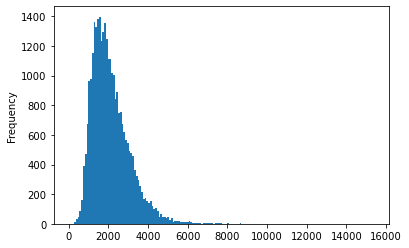

In [31]:
binvar = np.sqrt(df_clean.sqft_living.count())
df_clean['sqft_living'].plot(kind = 'hist', bins = int(binvar))

<AxesSubplot:ylabel='Frequency'>

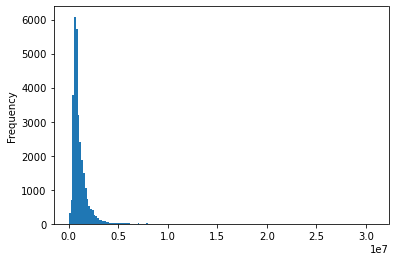

In [32]:
binvar = np.sqrt(df.price.count())
df['price'].plot(kind = 'hist', bins = int(binvar))

In [33]:
# Removing top 1% of price to reduce outliers

df_clean_price = df_clean[df_clean['price'] < df_clean['price'].quantile(0.99)]

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        30155 non-null  float64
 1   bedrooms     30155 non-null  int64  
 2   bathrooms    30155 non-null  float64
 3   sqft_living  30155 non-null  int64  
 4   sqft_lot     30155 non-null  int64  
 5   floors       30155 non-null  float64
 6   waterfront   30155 non-null  int64  
 7   greenbelt    30155 non-null  int64  
 8   nuisance     30155 non-null  int64  
 9   condition    30155 non-null  int64  
 10  grade        30155 non-null  int64  
 11  sqft_garage  30155 non-null  int64  
 12  sqft_patio   30155 non-null  int64  
 13  yr_built     30155 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.2 MB


In [35]:
df_clean_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29845 entries, 0 to 30154
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        29845 non-null  float64
 1   bedrooms     29845 non-null  int64  
 2   bathrooms    29845 non-null  float64
 3   sqft_living  29845 non-null  int64  
 4   sqft_lot     29845 non-null  int64  
 5   floors       29845 non-null  float64
 6   waterfront   29845 non-null  int64  
 7   greenbelt    29845 non-null  int64  
 8   nuisance     29845 non-null  int64  
 9   condition    29845 non-null  int64  
 10  grade        29845 non-null  int64  
 11  sqft_garage  29845 non-null  int64  
 12  sqft_patio   29845 non-null  int64  
 13  yr_built     29845 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.4 MB


In [36]:
# Creating base model with 99% of price

y = df_clean_price['price']
X = df_clean_price[['bathrooms', 'sqft_living', 'grade']]

model_price_base = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
model_price_base.params

const         -928065.79409
bathrooms      -24244.10834
sqft_living       304.46272
grade          183713.95132
dtype: float64

In [37]:
model_base.params

const         -74432.62433
sqft_living      560.00502
dtype: float64

In [38]:
# Centering data with 99% of price

X_price_centered = df_clean_price.copy()

for col in X_price_centered.columns:
    X_price_centered[col] = X_price_centered[col] - X_price_centered[col].mean()
    
X_price_centered.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_garage,sqft_patio,yr_built
count,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000
mean,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000
std,627895.29097,0.97551,0.85975,916.42921,59828.52525,0.56760,0.11862,0.15784,0.37862,0.70304,1.11119,281.20587,239.00660,32.04508
min,-1023892.23062,-3.40499,-2.31561,-2081.82245,-16113.05214,-0.54081,-0.01427,-0.02557,-0.17343,-2.47271,-6.62439,-326.96291,-213.57882,-75.02828
25%,-406252.23062,-0.40499,-0.31561,-674.82245,-11700.05214,-0.54081,-0.01427,-0.02557,-0.17343,-0.47271,-0.62439,-326.96291,-173.57882,-22.02828
50%,-196252.23062,-0.40499,0.18439,-174.82245,-9076.05214,-0.04081,-0.01427,-0.02557,-0.17343,-0.47271,-0.62439,68.03709,-63.57882,1.97172
75%,238747.76938,0.59501,0.68439,505.17755,-6056.05214,0.45919,-0.01427,-0.02557,-0.17343,0.52729,0.37561,183.03709,96.42118,27.97172
max,3246747.76938,9.59501,8.18439,13275.17755,3237416.94786,2.45919,0.98573,0.97443,0.82657,1.52729,5.37561,3253.03709,4156.42118,46.97172


In [39]:
# Creating centered model with 99% of price

y = df_clean_price['price']
X = X_price_centered[['bathrooms', 'sqft_living', 'grade']]

model_price_centered = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
model_price_centered.params

const         1051252.23062
bathrooms      -24244.10834
sqft_living       304.46272
grade          183713.95132
dtype: float64

In [46]:
df_clean_price['bathrooms'].mean(), df_clean_price['sqft_living'].mean(), df_clean_price['grade'].mean()

(2.3156140056960965, 2084.8224493214943, 7.624392695593902)

In [40]:
# Standardizing data with 99% of price

X_price_standardized = df_clean_price.copy()

for col in X_price_standardized:
    X_price_standardized[col] = (X_price_standardized[col] - X_price_standardized[col].mean()) \
                            / X_price_standardized[col].std()
    
X_price_standardized.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_garage,sqft_patio,yr_built
count,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000,29845.00000
mean,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.63067,-3.49049,-2.69336,-2.27167,-0.26932,-0.95280,-0.12033,-0.16197,-0.45805,-3.51715,-5.96155,-1.16272,-0.89361,-2.34134
25%,-0.64701,-0.41516,-0.36710,-0.73636,-0.19556,-0.95280,-0.12033,-0.16197,-0.45805,-0.67237,-0.56192,-1.16272,-0.72625,-0.68742
50%,-0.31256,-0.41516,0.21446,-0.19076,-0.15170,-0.07190,-0.12033,-0.16197,-0.45805,-0.67237,-0.56192,0.24195,-0.26601,0.06153
75%,0.38024,0.60995,0.79603,0.55125,-0.10122,0.80900,-0.12033,-0.16197,-0.45805,0.75001,0.33802,0.65090,0.40342,0.87289
max,5.17084,9.83594,9.51949,14.48576,54.11160,4.33262,8.31002,6.17366,2.18309,2.17240,4.83772,11.56817,17.39040,1.46580


In [41]:
# Creating standardized model with 99% of price

y = df_clean_price['price']
X = X_price_standardized[['bathrooms', 'sqft_living', 'grade']]

model_price_standardized = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
model_price_standardized.params

const         1051252.23062
bathrooms      -20843.88752
sqft_living    279018.52829
grade          204140.45623
dtype: float64

In [42]:
df_clean_price['bathrooms'].std(), df_clean_price['sqft_living'].std(), df_clean_price['grade'].std()

(0.8597506338686405, 916.4292054194565, 1.1111864655094894)

In [43]:
df_clean_price['bathrooms'].value_counts()

2.50000     8450
2.00000     7332
1.00000     4560
3.00000     4094
3.50000     2221
1.50000     1807
4.00000      625
4.50000      474
5.00000      118
5.50000       71
0.00000       31
6.00000       29
6.50000       13
7.50000        7
0.50000        5
7.00000        4
9.50000        2
10.00000       1
10.50000       1
Name: bathrooms, dtype: int64

In [44]:
df_clean_price['bathrooms'].mean()

2.3156140056960965

In [45]:
X_price_standardized['bathrooms'].value_counts()

0.21446     8450
-0.36710    7332
-1.53023    4560
0.79603     4094
1.37759     2221
-0.94866    1807
1.95916      625
2.54072      474
3.12228      118
3.70385       71
-2.69336      31
4.28541       29
4.86698       13
6.03010        7
-2.11179       5
5.44854        4
8.35636        2
9.51949        1
8.93792        1
Name: bathrooms, dtype: int64